# Analisando os Sentimentos na Discografia de Harry Styles

A análise de sentimentos e inferência de emoções em músicas são técnicas que buscam identificar e interpretar as emoções expressas nas letras das canções. Esse tipo de análise utiliza algoritmos e modelos de aprendizado de máquina, como o Processamento de Linguagem Natural (PLN), para avaliar as palavras e frases contidas nas letras, classificando-as em polaridades como positivo, negativo ou neutro.

As letras de músicas são ricas em emoção e podem refletir uma ampla gama de sentimentos, como amor, tristeza, alegria, raiva e nostalgia, logo, a análise de sentimentos permite que artistas, produtores e ouvintes compreendam melhor como a música pode impactar as emoções humanas e a percepção do público. Com o avanço das tecnologias de Inteligência Artificial (IA) e PLN, a análise de sentimento em músicas está se tornando cada vez mais sofisticada, permitindo uma compreensão mais profunda e complexa das emoções humanas expressas através da arte musical.

## Importando Bibliotecas

In [68]:
# Importando bibliotecas de manipulação e análise de dados
import pandas as pd  # Usado para manipulação de tabelas e dataframes
import numpy as np   # Usado para operações matemáticas e arrays numéricos

# Biblioteca para processamento de imagens
from PIL import Image  # Usado para abrir, manipular e processar imagens

# Biblioteca para geração de nuvem de palavras (wordcloud)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# STOPWORDS: remove palavras irrelevantes
# ImageColorGenerator: usa as cores de uma imagem para colorir a wordcloud

# Biblioteca de NLP (Processamento de Linguagem Natural)
from nltk.tokenize import word_tokenize  # Quebra textos em palavras (tokens)

# Biblioteca para visualização de dados
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações
from matplotlib.pyplot import figure  # Ajuste de tamanho de figuras
%matplotlib inline

# Baixando recursos da biblioteca NLTK
import nltk
nltk.download('punkt_tab')  # Tokenizador de pontuação/tabulação
nltk.download('vader_lexicon')  # Léxico para análise de sentimentos com VADER (análise de sentimentos)

# Biblioteca de visualização estatística
import seaborn as sns  # Estilização e gráficos estatísticos avançados

# Instalando bibliotecas com ! (comando de terminal usado no Jupyter)
!pip install shapely  # manipulação de formas geométricas
!pip install descartes       # Necessária para exibir formas geométricas com matplotlib
!pip install pyplutchik      # Biblioteca para visualização de emoções com o modelo de Plutchik

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Carregando arquivo com as músicas da Banda

O arquivo CSV foi gerado no notebook *Lyrics.ipynb*, contendo informações detalhadas sobre as músicas do famoso cantor. O *dataset* inclui dados como título das faixas, álbum e ano de lançamento através da API *Genius*. A exportação para CSV permite uma fácil visualização, análise e compartilhamento dos dados.

In [69]:
# Leitura do Arquivo
df=pd.read_csv("HarryStylesLyrics.csv")

# Remove a coluna 'release_date'
df = df.drop(columns=['release_date'])

# Visualização do Dataframe
df

title  \
0              Sign of the Times   
1                      As It Was   
2               Watermelon Sugar   
3                        Falling   
4                      Adore You   
5                      Fine Line   
6                        Matilda   
7                           Kiwi   
8                         Cherry   
9                      Lights Up   
10                        Golden   
11                    Two Ghosts   
12                Sweet Creature   
13                           She   
14             Sunflower, Vol. 6   
15                  Little Freak   
16               To Be So Lonely   
17            Late Night Talking   
18                    Boyfriends   
19                  Keep Driving   
20               Love Of My Life   
21                      Daylight   
22         From the Dining Table   
23                        Cinema   
24  Music for a Sushi Restaurant   
25                    Grapejuice   
26                    Only Angel   
27        Meet Me in the Hallway   
28           Ever Since New York   
29                         Woman   
30                     Satellite   
31                      Carolina   
32                   Canyon Moon   
33    Treat People With Kindness   
34                   Daydreaming   

                                               lyrics          Album  \
0   just stop crying sign times welcome final show...   Harry Styles   
1   come harry wanna goodnight  holdin back gravit...  Harry’s House   
2   tastes like strawberries summer evenin sounds ...      Fine Line   
3   here there blame drink wandering hands forget ...      Fine Line   
4   harry styles walk rainbow paradise paradise st...      Fine Line   
5   price emotion looking something devotion hate ...      Fine Line   
6   riding bike sound deal trying lift ground whee...  Harry’s House   
7   worked cheap pack cigarettes hard liquor mixed...   Harry Styles   
8   camille rowe coucou  harry styles call baby ta...      Fine Line   
9   what mean sorry never coming back down could w...      Fine Line   
10  golden golden golden open eyes hold focus hopi...      Fine Line   
11  same lips eyes blue same white shirt couple ta...   Harry Styles   
12  another talk going wrong still young know goin...   Harry Styles   
13  nine morning drops kids school thinking like s...      Fine Line   
14  sunflower sunflower eyes want melody inside wi...      Fine Line   
15  little freak jezebel high atop kitchen counter...  Harry’s House   
16  blame falling little blame drunk caller wasn r...      Fine Line   
17  things quite same there haze horizon babe coup...  Harry’s House   
18  think easy they take granted they know they mi...  Harry’s House   
19  black white film camera yellow sunglasses tray...  Harry’s House   
20  baby love life woah maybe know what lost till ...  Harry’s House   
21  roof airplane seat nose bleedin looking life t...  Harry’s House   
22  woke alone hotel room played myself fell back ...   Harry Styles   
23  gettin darling cool stubborn comes this guess ...  Harry’s House   
24  green eyes fried rice could cook late night ga...  Harry’s House   
25  three  yesterday finally came sunny afternoon ...  Harry’s House   
26  angel really angel  open eyes shut mouth that ...   Harry Styles   
27  three four  meet hallway meet hallway left bed...   Harry Styles   
28  tell something tell something know nothing pre...   Harry Styles   
29  alex salibian should search romantic comedies ...   Harry Styles   
30  life bothering wanna talk share last line then...  Harry’s House   
31  yeah yeah yeah family carolina yeah away says ...   Harry Styles   
32  gotta believe never looked blue hard leave tha...      Fine Line   
33  lucius maybe find place feel good treat people...      Fine Line   
34  livin daydream said love like paid know gone l...  Harry’s House   

    release_year  Word Count  
0           2017         183  
1           2022          97  
2           2019         173  
3           2

In [72]:
# Lista de palavras indesejadas presentes na discografia e não identificadas na etapa de tokenização
indesejadas = ['harry','styles','na','yeah','that','this','what']

# Remove as palavras indesejadas, e salva de volta como um texto longo
df['lyrics'] = df['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))

# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 3552 palavras no dataset de letra.
Existem 832 palavras únicas no dataset de letras.


## Análise da Discografia
Primeiramente, será realizada uma análise exploratória do dataset como um todo, visando compreender sua estrutura, distribuição e características principais. Essa etapa é essencial para identificar padrões, possíveis inconsistências e *insights* iniciais sobre os dados. Essa análise preliminar ajudará a direcionar investigações mais específicas e a garantir a qualidade dos dados antes de aprofundar o estudo.

### Analisando o Dataset

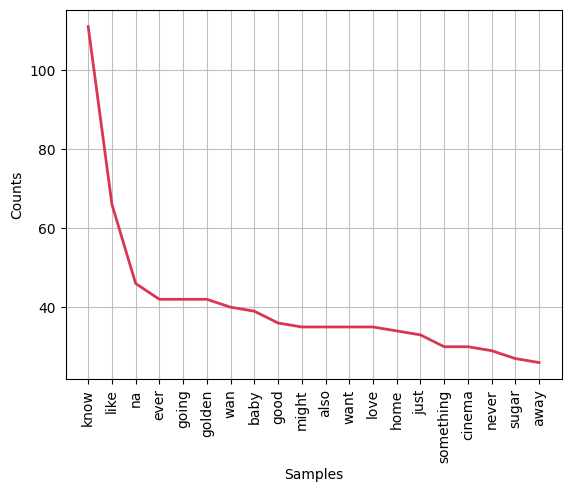

In [73]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Resultado do Gráfico</strong><br>
    Top 20 palavras mais frequentes na discografia do cantor.
</div>

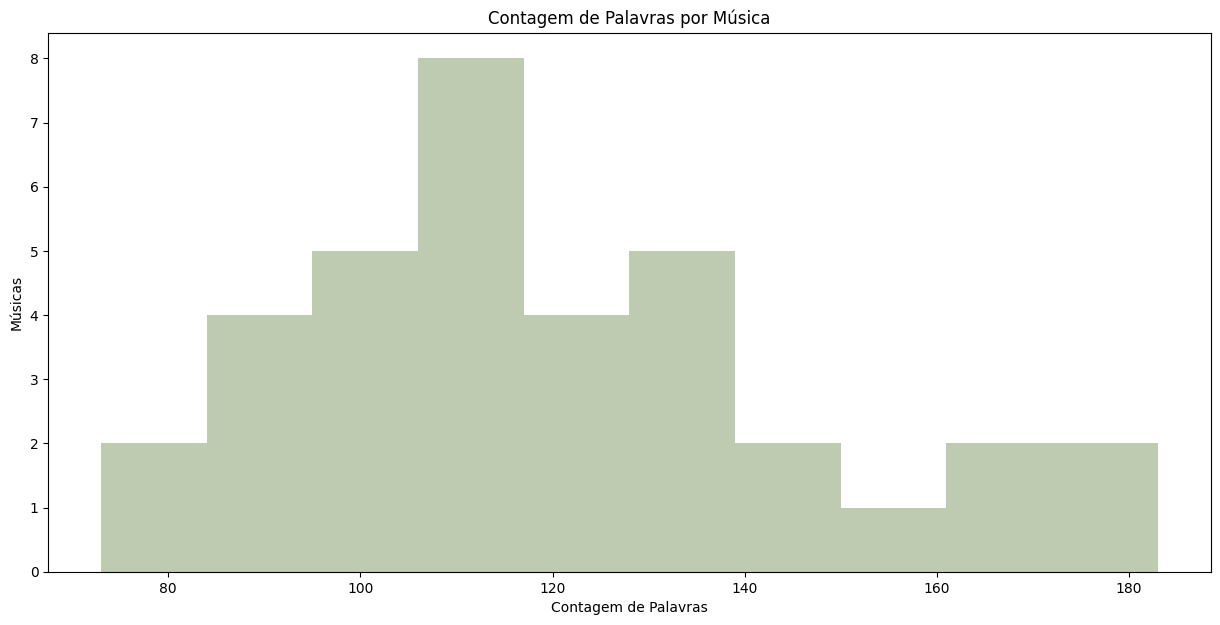

In [74]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    O resultado é um histograma que representa a distribuição da contagem de palavras das músicas. Cada barra no histograma mostra quantas músicas caem dentro de cada intervalo de contagem de palavras. Isso permite visualizar rapidamente como as músicas se distribuem em relação à sua contagem de palavras, identificando padrões, como se a maioria das músicas tende a ser mais curtas ou mais longas.
</div>

### Análise de Sentimento da Discografia

A análise de sentimentos é uma técnica da área de Processamento de Linguagem Natural (PLN) que tem como objetivo identificar e classificar emoções expressas em textos, como opiniões, comentários, avaliações e postagens em redes sociais. Um dos principais aspectos dessa análise é a **polaridade**, que indica a direção do sentimento expresso: **positivo**, **negativo** ou **neutro**.

**Polaridade Positiva** refere-se a textos que expressam sentimentos favoráveis, elogios ou apreciações. Exemplos incluem palavras como "ótimo", "maravilhoso", "excelente" e "gostei". Comentários positivos geralmente indicam satisfação com um produto, serviço ou experiência.

**Polaridade Negativa**, por sua vez, é associada a emoções negativas, críticas ou insatisfações. Termos como "horrível", "péssimo", "não gostei" e "decepcionante" são indicadores comuns. Esse tipo de polaridade ajuda a identificar pontos de melhoria a partir de feedbacks negativos dos usuários.

Já a **Polaridade Neutra** está presente em textos que não expressam uma opinião clara ou não possuem carga emocional significativa. Comentários como "o produto chegou ontem", "estava chovendo" ou "fiz a compra hoje" são exemplos de frases informativas, sem julgamento emocional.

Em aplicações práticas, a identificação correta da polaridade é essencial para empresas e pesquisadores compreenderem melhor o comportamento e a percepção dos usuários. Isso pode influenciar estratégias de marketing, aprimoramento de produtos e até mesmo monitoramento de reputação online.

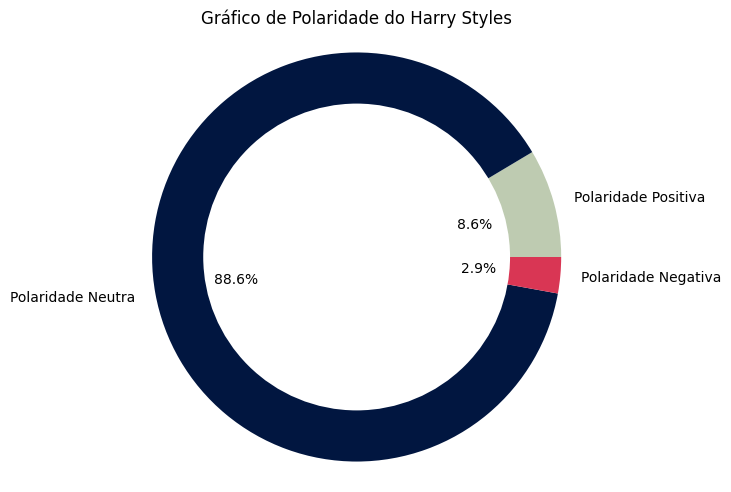

In [75]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do Harry Styles')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    A discografia apresenta 8.6% de polaridade positiva e 2.9% de polaridade negativa.
</div>

### Nuvem de Palavras
A **nuvem de palavras** (ou *word cloud*, em inglês) é uma técnica visual utilizada para representar a frequência ou relevância de palavras em um determinado conjunto de dados textuais. Nesse tipo de visualização, quanto mais uma palavra aparece em um texto ou conjunto de textos, maior será o seu destaque na nuvem — normalmente por meio de um tamanho de fonte mais elevado.

Essa ferramenta é muito usada em análises exploratórias de dados textuais, especialmente em áreas como análise de sentimentos, mineração de texto, marketing digital, pesquisa acadêmica, entre outras. Ela permite uma compreensão rápida dos termos mais recorrentes em conteúdos como comentários de usuários, postagens em redes sociais, discursos políticos, letras de músicas ou avaliações de produtos.

A construção de uma nuvem de palavras geralmente envolve etapas de pré-processamento do texto, como:
- **Remoção de stopwords** (palavras comuns como “de”, “o”, “e”, que não agregam valor semântico relevante);
- **Lematização ou stemming** (redução de palavras à sua forma base);
- **Tratamento de pontuação e acentuação**.

Embora seja uma técnica simples, a nuvem de palavras oferece uma forma intuitiva e visual de identificar temas recorrentes, tendências e padrões de linguagem.

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count'], dtype='object')


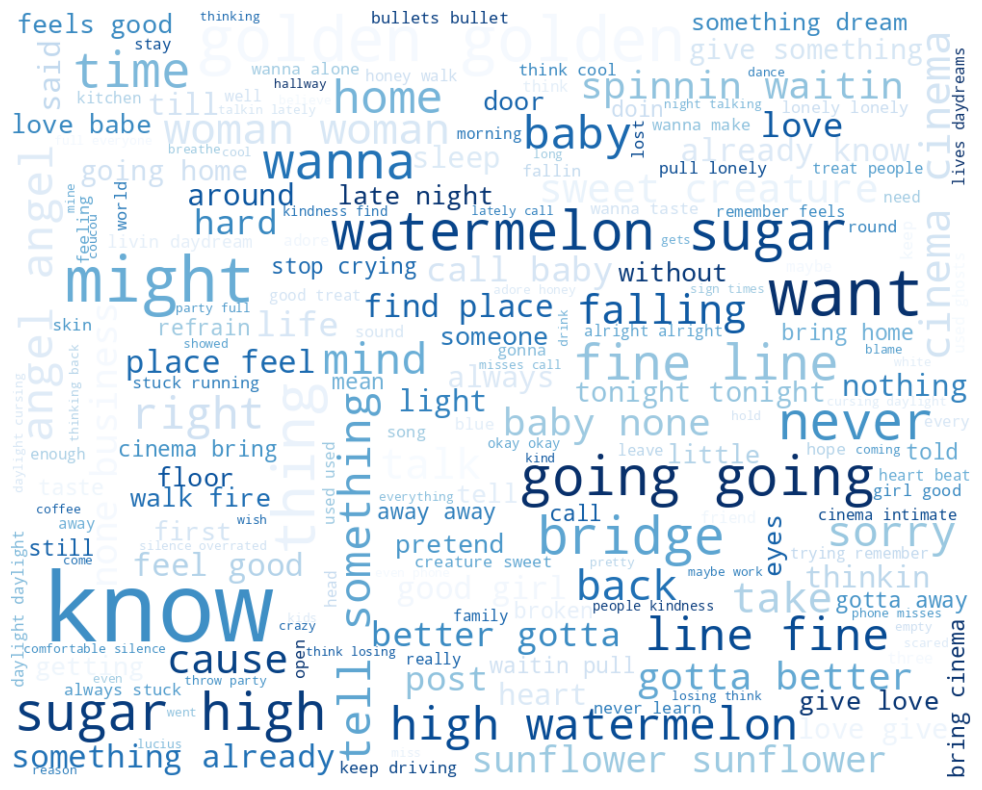

In [76]:
# Exibir os nomes das colunas do DataFrame
print(df.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df['lyrics'] = df['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

## Análise NRC para Inferência de Emoções
O arquivo NRC (National Research Council) é um recurso amplamente utilizado na análise de sentimentos, especialmente no contexto de processamento de linguagem natural (PLN) e mineração de texto. O NRC desenvolveu um léxico de sentimentos que categoriza palavras em diferentes emoções, permitindo que pesquisadores e desenvolvedores analisem letras de músicas, resenhas e outros textos em relação a sentimentos específicos.

### Estrutura do Arquivo NRC
O léxico do NRC é estruturado em várias colunas, onde as palavras são associadas a diferentes emoções e sentimentos, incluindo: Alegria, Tristeza, Medo,
Raiva, Surpresa, Desprezo, Confiança e Antipatia. Cada palavra no léxico é marcada como presente ou ausente em relação a essas emoções, permitindo que os usuários quantifiquem e analisem a presença de sentimentos em um texto.

### Aplicações na Análise de Músicas
Identificação de Emoções: Ao aplicar o léxico NRC às letras de músicas, é possível identificar quais emoções são mais proeminentes em uma canção. Por exemplo, uma letra pode ser classificada como predominantemente alegre, triste ou reflexiva.

**Comparação Entre Músicas:** O NRC permite a comparação de diferentes músicas ou álbuns, facilitando a análise de como os sentimentos evoluem ao longo do tempo ou entre diferentes artistas. Essa comparação pode revelar como as temáticas abordadas nas letras mudam conforme a carreira de um artista avança.

**Análise de Tendências:** Ao analisar um conjunto de músicas (por exemplo, todas as músicas lançadas em um determinado ano), os pesquisadores podem identificar tendências emocionais na música popular. Isso pode fornecer insights sobre a cultura e os sentimentos coletivos de uma sociedade em um período específico.

**Desenvolvimento de Recomendação:** O entendimento dos sentimentos nas músicas pode ajudar a criar sistemas de recomendação mais personalizados, sugerindo músicas com base no estado emocional do ouvinte.

O uso do arquivo NRC na análise de letras de músicas é uma ferramenta poderosa para compreender as emoções expressas na música. Com a capacidade de quantificar sentimentos, pesquisadores e desenvolvedores podem explorar a rica tapeçaria emocional das letras e como elas ressoam com os ouvintes. Essa análise não apenas enriquece nossa compreensão da música como arte, mas também nos oferece uma janela para as emoções humanas e a cultura contemporânea.

In [77]:
#Biblioteca para usar o NRC alinhado ao NLTK
from collections import defaultdict

# Carregar o lexicon NRC
nrc = pd.read_csv("NRC.tsv", sep='\t', names=['word', 'sentiment', 'association'])
nrc = nrc[nrc['association'] == 1]

# Definir emoções (exclui 'positive' e 'negative')
emotion_sentiments = {
    'anger', 'anticipation', 'disgust', 'fear',
    'joy', 'sadness', 'surprise', 'trust'
}

# Dicionário: palavra -> lista de emoções
nrc_dict = defaultdict(list)
for _, row in nrc.iterrows():
    if row['sentiment'] in emotion_sentiments:
        nrc_dict[row['word']].append(row['sentiment'])

# Emoções positivas e negativas para score
positive = {'joy', 'trust', 'anticipation', 'surprise'}
negative = {'anger', 'fear', 'disgust', 'sadness'}

# Função de análise
def analyze_text(text):
    tokens = word_tokenize(text.lower())
    sentiments_count = defaultdict(int)

    for token in tokens:
        for sentiment in nrc_dict.get(token, []):
            sentiments_count[sentiment] += 1

    score = sum(sentiments_count[s] for s in positive) - \
            sum(sentiments_count[s] for s in negative)

    dominant_emotion = max(sentiments_count, key=sentiments_count.get) if sentiments_count else 'neutral'
    filter_label = 'intenso' if abs(score) > 2 else 'neutro'

    return pd.Series([score, dominant_emotion, filter_label], index=['score', 'sentiment', 'filter'])

# Aplicar no DataFrame
df[['score', 'sentiment', 'filter']] = df['lyrics'].apply(analyze_text)

# Normalizar a coluna 'score' entre -1 e 1
min_score = df['score'].min()
max_score = df['score'].max()

# Evitar divisão por zero se max == min
if min_score != max_score:
    df['score'] = 2 * ((df['score'] - min_score) / (max_score - min_score)) - 1
else:
    df['score'] = 0  # ou qualquer valor neutro

# Fazendo cópias para análises profundas
df_original = df.copy()
df_original_2 = df_original.copy()
df_original_3 = df_original.copy()

# Exibir resultado
df

title  \
0              Sign of the Times   
1                      As It Was   
2               Watermelon Sugar   
3                        Falling   
4                      Adore You   
5                      Fine Line   
6                        Matilda   
7                           Kiwi   
8                         Cherry   
9                      Lights Up   
10                        Golden   
11                    Two Ghosts   
12                Sweet Creature   
13                           She   
14             Sunflower, Vol. 6   
15                  Little Freak   
16               To Be So Lonely   
17            Late Night Talking   
18                    Boyfriends   
19                  Keep Driving   
20               Love Of My Life   
21                      Daylight   
22         From the Dining Table   
23                        Cinema   
24  Music for a Sushi Restaurant   
25                    Grapejuice   
26                    Only Angel   
27        Meet Me in the Hallway   
28           Ever Since New York   
29                         Woman   
30                     Satellite   
31                      Carolina   
32                   Canyon Moon   
33    Treat People With Kindness   
34                   Daydreaming   

                                               lyrics          Album  \
0   just stop crying sign times welcome final show...   Harry Styles   
1   come wanna goodnight holdin back gravity holdi...  Harry’s House   
2   tastes like strawberries summer evenin sounds ...      Fine Line   
3   here there blame drink wandering hands forget ...      Fine Line   
4   walk rainbow paradise paradise strawberry lips...      Fine Line   
5   price emotion looking something devotion hate ...      Fine Line   
6   riding bike sound deal trying lift ground whee...  Harry’s House   
7   worked cheap pack cigarettes hard liquor mixed...   Harry Styles   
8   camille rowe coucou call baby talkin lately ca...      Fine Line   
9   mean sorry never coming back down could wouldn...      Fine Line   
10  golden golden golden open eyes hold focus hopi...      Fine Line   
11  same lips eyes blue same white shirt couple ta...   Harry Styles   
12  another talk going wrong still young know goin...   Harry Styles   
13  nine morning drops kids school thinking like s...      Fine Line   
14  sunflower sunflower eyes want melody inside wi...      Fine Line   
15  little freak jezebel high atop kitchen counter...  Harry’s House   
16  blame falling little blame drunk caller wasn r...      Fine Line   
17  things quite same there haze horizon babe coup...  Harry’s House   
18  think easy they take granted they know they mi...  Harry’s House   
19  black white film camera yellow sunglasses tray...  Harry’s House   
20  baby love life woah maybe know lost till find ...  Harry’s House   
21  roof airplane seat nose bleedin looking life t...  Harry’s House   
22  woke alone hotel room played myself fell back ...   Harry Styles   
23  gettin darling cool stubborn comes guess time ...  Harry’s House   
24  green eyes fried rice could cook late night ga...  Harry’s House   
25  three yesterday finally came sunny afternoon f...  Harry’s House   
26  angel really angel open eyes shut mouth still ...   Harry Styles   
27  three four meet hallway meet hallway left bedr...   Harry Styles   
28  tell something tell something know nothing pre...   Harry Styles   
29  alex salibian should search romantic comedies ...   Harry Styles   
30  life bothering wanna talk share last line then...  Harry’s House   
31  family carolina away says remind home feelin h...   Harry Styles   
32  gotta believe never looked blue hard leave alw...      Fine Line   
33  lucius maybe find place feel good treat people...      Fine Line   
34  livin daydream said love like paid know gone l...  Harry’s House   

    release_year  Word Count     score     sentiment   filter  
0           2017         183  0.123967           joy  intenso  
1        

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Normalização de Dados</strong><br>
    Para evitar validação cruzada de dados e separação de base de teste e aplicação, foi utilizado uma função de normalização de dados.
</div>

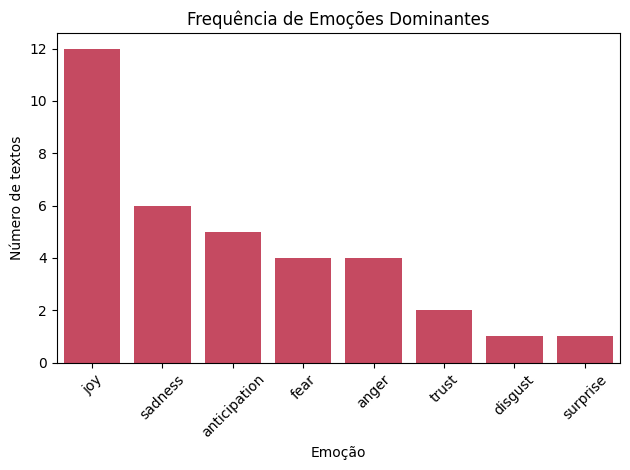

In [78]:
 # Cria um gráfico de barras com contagem
sns.countplot(
    x='sentiment',
    data=df,
    order=df['sentiment'].value_counts().index,  # Ordena as barras pela frequência de cada emoção
    color='#D93654'
)

# Construção do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()                             # Ajusta o layout para evitar que os textos fiquem cortados
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    A discografia possui alto teor de alegria.
</div>

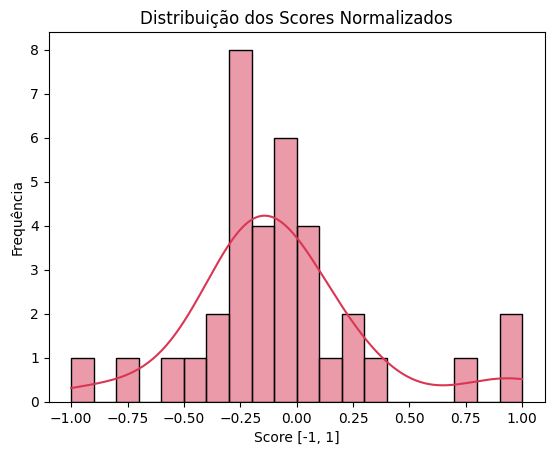

In [79]:
sns.histplot(df['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    Os scores estão bem concentrados em ambas as polaridades.
</div>

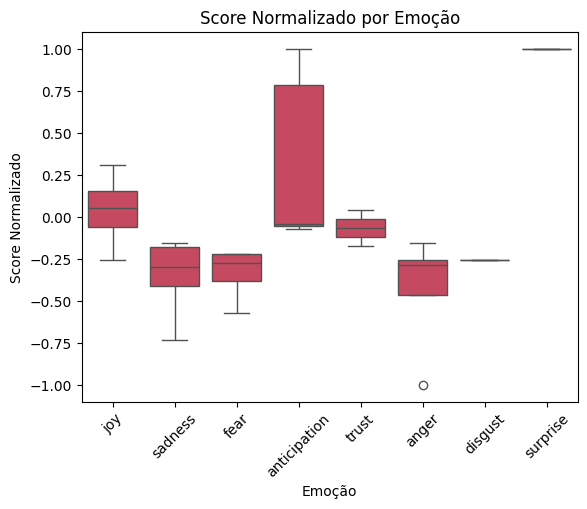

In [80]:
sns.boxplot(x='sentiment', y='score', data=df, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

Esse gráfico boxplot compara os scores normalizados de sentimento para cada emoção.

- O **centro da caixa** é a **mediana** (valor do meio).
- As **caixas** mostram o intervalo interquartílico (de 25% a 75% dos dados).
- Os **"bigodes"** (linhas fora das caixas) mostram a dispersão.
- Os **pontos fora do padrão** são **outliers**.



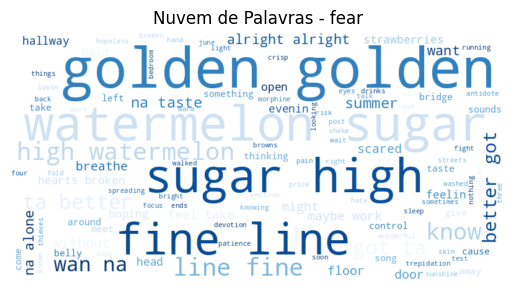

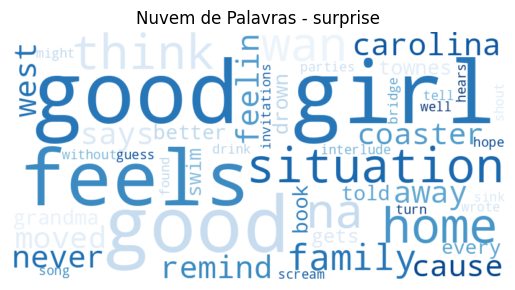

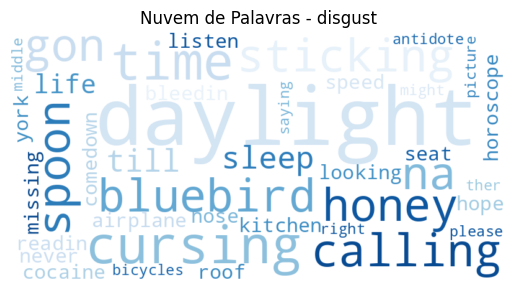

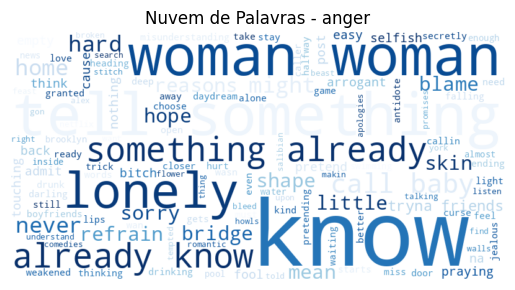

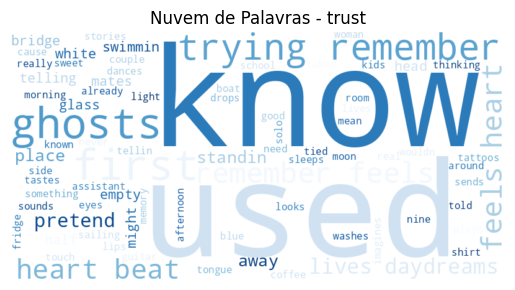

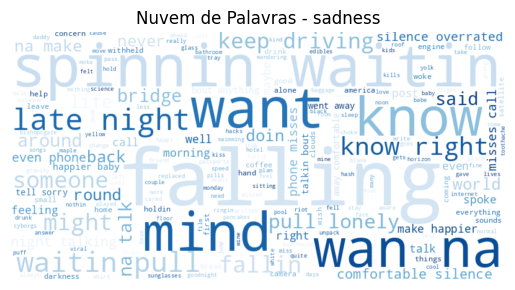

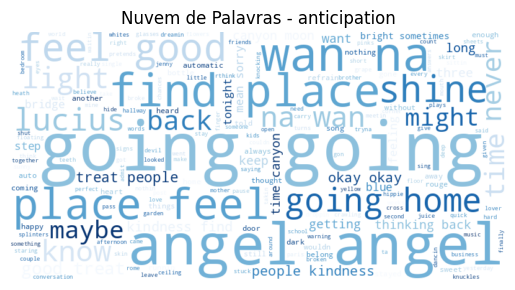

In [81]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []
    for text in df[df['sentiment'] == emotion]['lyrics']:
        words.extend(word_tokenize(text.lower()))

    # Verificar se há palavras antes de gerar a nuvem
    if not words:
        print(f"Nenhuma palavra encontrada para a emoção: {emotion}")
        continue

    # Gerar a nuvem de palavras com fundo branco e tons de azul
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',  # Fundo branco
        colormap='Blues'  # Paleta de tons de azul
    ).generate(' '.join(words))

    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de Palavras - {emotion}')
    plt.show()

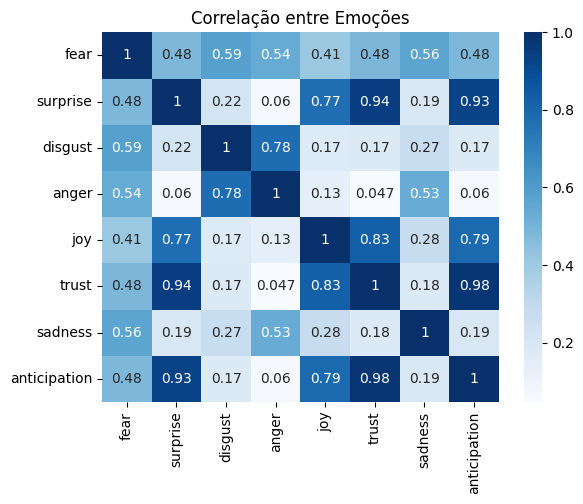

In [82]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

## Análise do álbum Harry Styles

Harry Styles é o álbum de estúdio de estreia homônimo do cantor, lançado em 12 de maio de 2017, através da *Erskine* e *Columbia Records*. Para o álbum, Styles trabalhou com os produtores Jeff Bhasker, Alex Salibian, Tyler Johnson e Kid Harpoon. Liricamente, os temas de Harry Styles são dominados pelo foco em mulheres e relacionamentos. O disco foi descrito por várias publicações de música como uma coleção de *soft rock*, *britpop*, *pop* e *rock*.

Foi precedido pelo lançamento de seu primeiro *single*, "Sign of the Times", enquanto "Two Ghosts" e "Kiwi" serviram como o segundo e terceiro *singles*, respectivamente. Em apoio ao álbum, Styles embarcou em sua primeira turnê, *Harry Styles: Live on Tour*. O álbum recebeu críticas geralmente positivas dos críticos de música e estreou no topo das paradas em vários países, incluindo Austrália, Canadá, Reino Unido e EUA. Recebeu certificado de platina no Reino Unido, EUA, Austrália, Canadá, Itália, Brasil, Dinamarca, Polônia e México. De acordo com a Federação Internacional da Indústria Fonográfica (IFPI), Harry Styles foi o nono álbum de 2017 mais vendido globalmente, com vendas de um milhão de cópias.

Mais informações em: https://pt.wikipedia.org/wiki/Harry_Styles_(%C3%A1lbum)

In [83]:
# Filtrando o DataFrame para excluir músicas do seu álbum
df_hs = df[df['Album'].isin(['Harry Styles'])]

# Exibindo o DataFrame filtrado
df_hs

title                                             lyrics  \
0        Sign of the Times  just stop crying sign times welcome final show...   
7                     Kiwi  worked cheap pack cigarettes hard liquor mixed...   
11              Two Ghosts  same lips eyes blue same white shirt couple ta...   
12          Sweet Creature  another talk going wrong still young know goin...   
22   From the Dining Table  woke alone hotel room played myself fell back ...   
26              Only Angel  angel really angel open eyes shut mouth still ...   
27  Meet Me in the Hallway  three four meet hallway meet hallway left bedr...   
28     Ever Since New York  tell something tell something know nothing pre...   
29                   Woman  alex salibian should search romantic comedies ...   
31                Carolina  family carolina away says remind home feelin h...   

           Album  release_year  Word Count     score     sentiment   filter  
0   Harry Styles          2017         183  0.123967           joy  intenso  
7   Harry Styles          2017         151 -0.256198           joy  intenso  
11  Harry Styles          2017         115  0.041322         trust  intenso  
12  Harry Styles          2017         114  0.305785           joy  intenso  
22  Harry Styles          2017         113 -0.157025       sadness   neutro  
26  Harry Styles          2017         128  1.000000  anticipation  intenso  
27  Harry Styles          2017          99 -0.223140          fear   neutro  
28  Harry Styles          2017         110 -0.289256         anger  intenso  
29  Harry Styles          2017          85 -0.157025         anger   neutro  
31  Harry Styles          2017         139  1.000000      surprise  intenso

In [84]:
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_hs['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 1080 palavras no dataset de letra.
Existem 341 palavras únicas no dataset de letras.


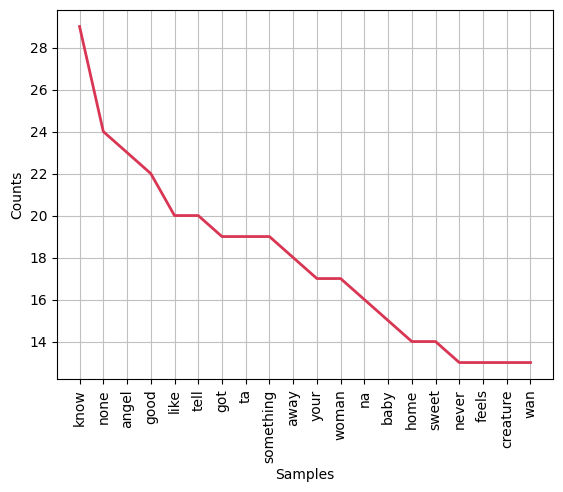

In [85]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

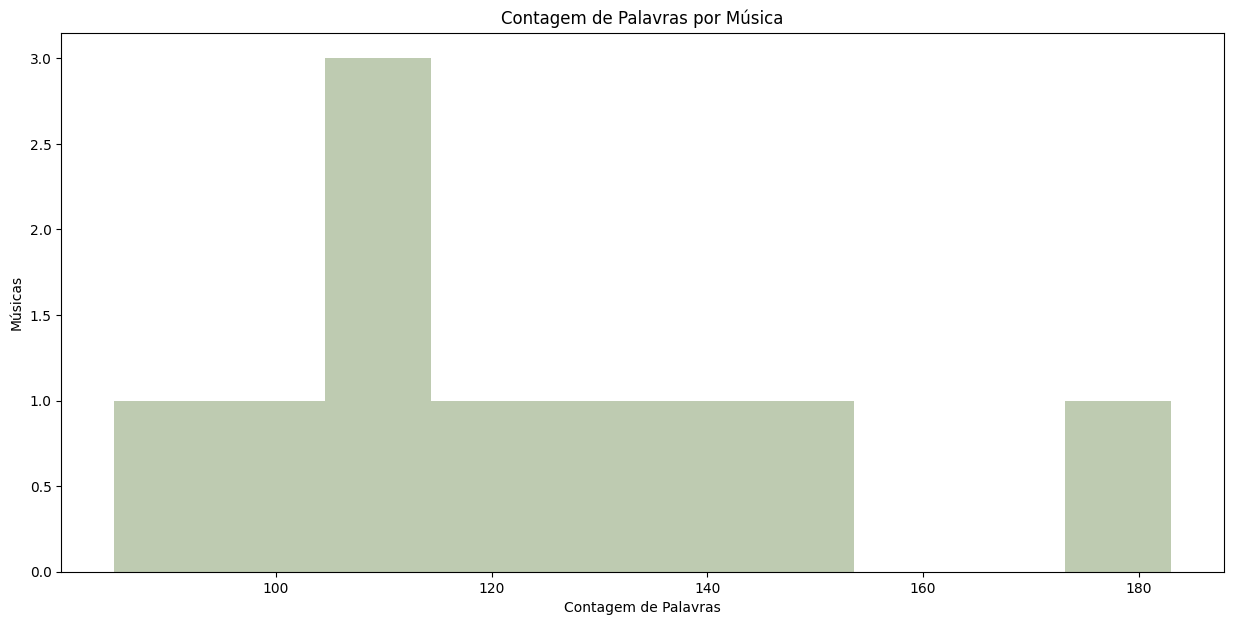

In [86]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_reflection
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_hs['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

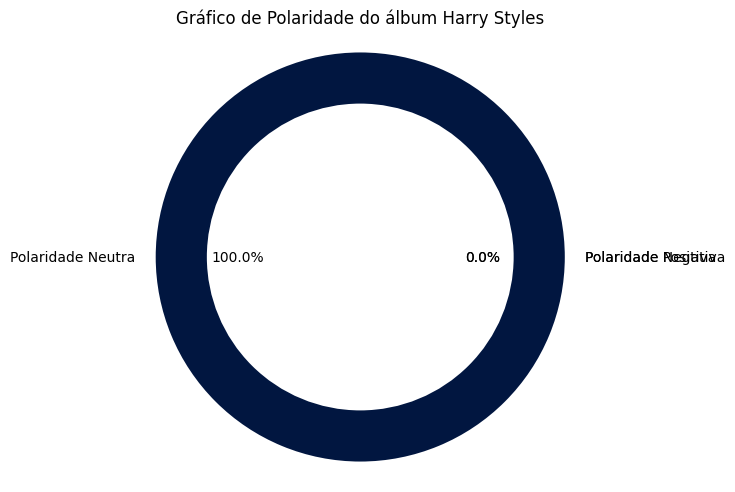

In [87]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_hs['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_hs['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do álbum Harry Styles')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    A discografia apresenta apenas polaridade neutra.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-88-f956fdad6731>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hs['lyrics'] = df_hs['lyrics'].fillna('')  # Substitui valores nulos por string vazia


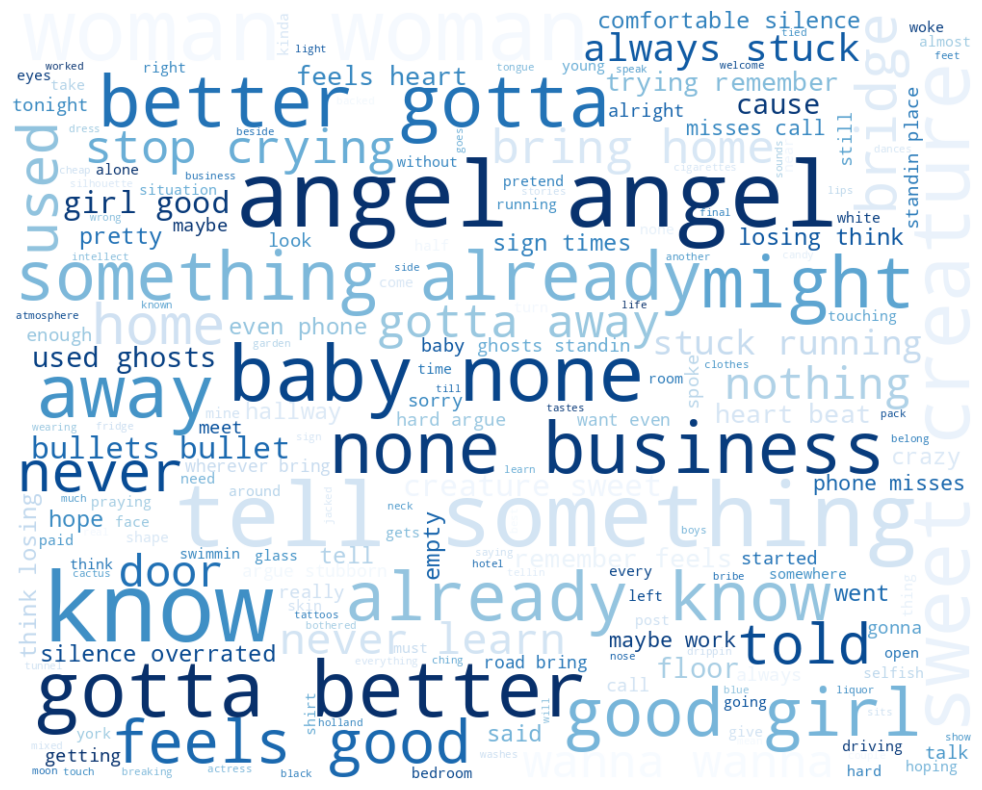

In [88]:
# Exibir os nomes das colunas do DataFrame
print(df_hs.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_hs.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_hs['lyrics'] = df_hs['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_hs['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

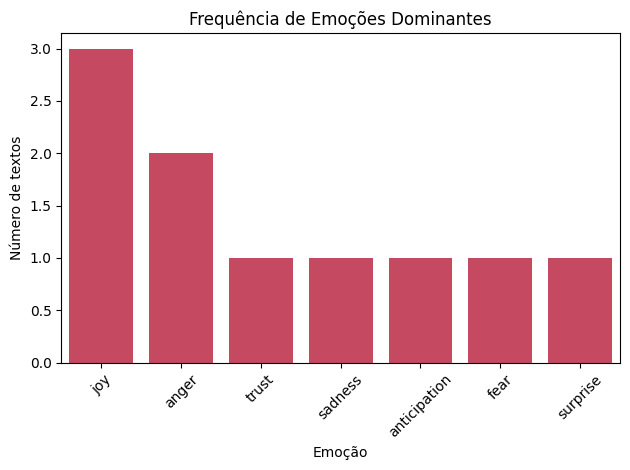

In [89]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_hs,
    order=df_hs['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

# Gerando o gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout() #Ajuste automático
plt.show()

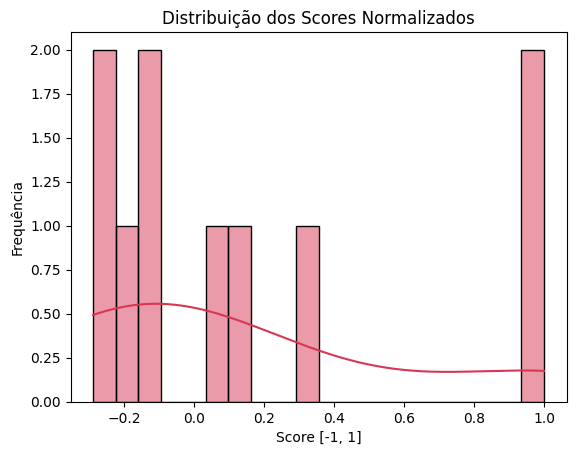

In [90]:
## Construção do Histograma
sns.histplot(df_hs['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

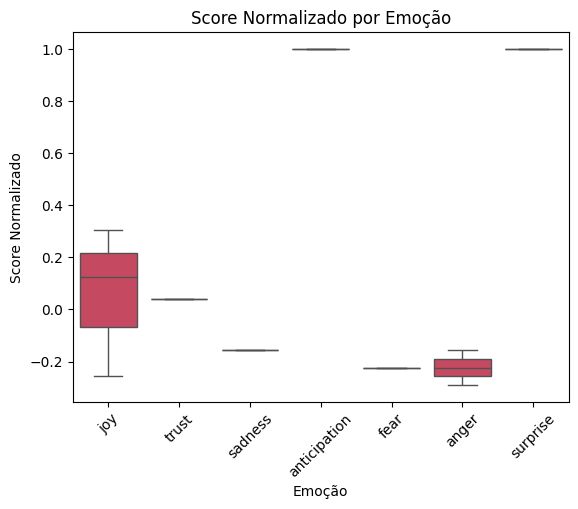

In [91]:
sns.boxplot(x='sentiment', y='score', data=df_hs, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

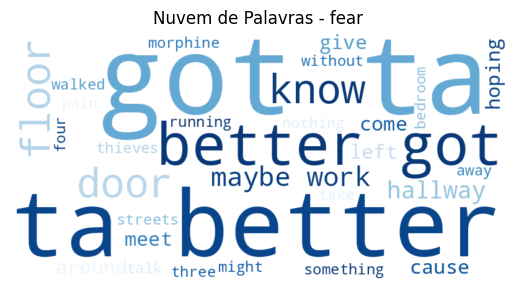

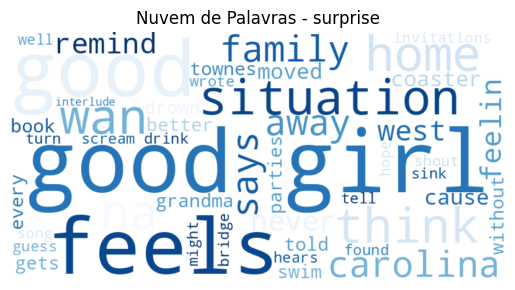

Nenhuma letra encontrada para a emoção 'disgust'.


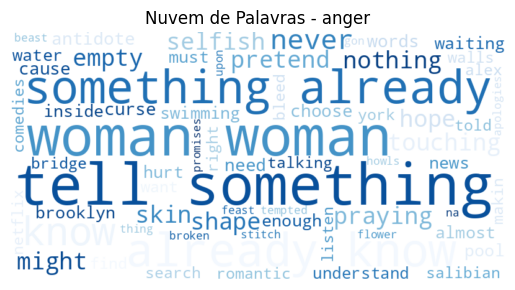

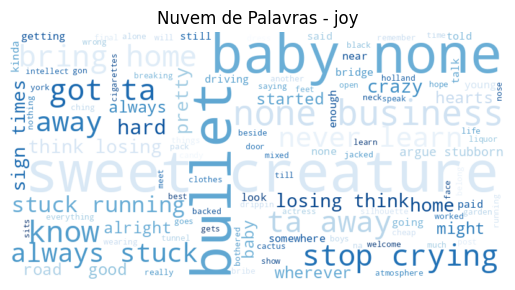

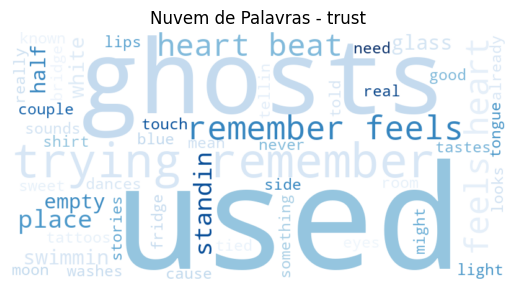

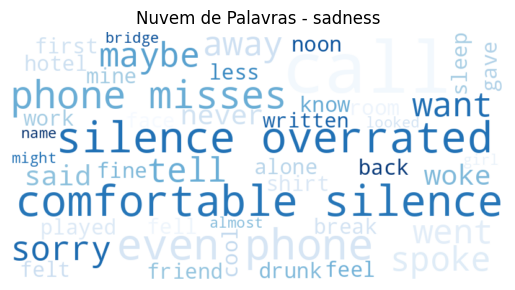

In [92]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_hs[df_hs['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

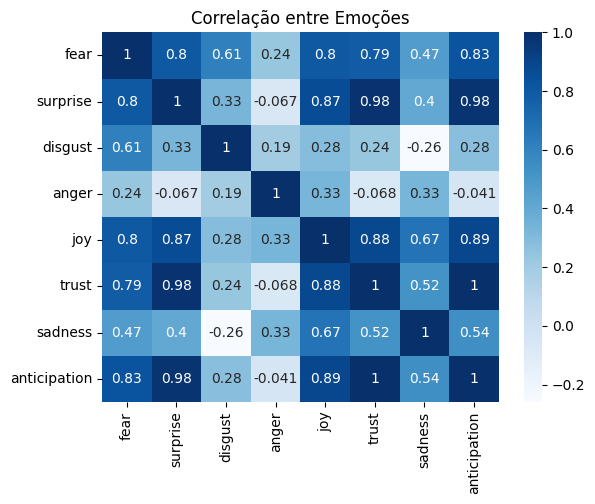

In [93]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_hs['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

### Análise do Álbum Fine Line

*Fine Line* é o segundo álbum de estúdio do cantor, lançado em 13 de dezembro de 2019, através da *Erskine* e *Columbia Records*. O disco foi descrito como *pop rock*, com elementos de pop progressivo, pop psicodélico, *folk*, *soul*, *funk* e *indie pop*.

Apoiado por sete *singles*: "Lights Up", "Adore You", "Falling", "Watermelon Sugar", "Golden", "Treat People with Kindness" e a faixa-título, *Fine Line* estreou no número três no *UK Albums Chart* e no número um na *Billboard 200*, tornando-se o segundo álbum número um consecutivo de Styles nos EUA. O álbum teve a terceira maior semana de vendas de 2019 nos EUA e quebrou o recorde de maior estreia de um artista masculino britânico desde que a Nielsen SoundScan começou, ganhando 478.000 unidades equivalentes ao álbum. Recebeu certificado de platina dupla nos EUA por vendas combinadas e unidades equivalentes ao álbum de mais de dois milhões de unidades no país.

*Fine Line* recebeu críticas geralmente positivas dos críticos de música, particularmente em relação à sua produção e influências estilísticas. Foi indicado para Álbum do Ano no *Brit Awards* de 2020 e para Melhor Álbum Vocal de Pop no *Grammy Awards* de 2021. O álbum também recebeu um *Grammy* de Melhor Performance Pop Solo e um *Brit Award* de *Single* Britânico do Ano por "Watermelon Sugar". Em 2020, a *Rolling Stone* o classificou no número 491 em sua lista dos 500 Maiores Álbuns de Todos os Tempos, tornando-se o álbum mais recente a ser incluído.

Mais informações em: https://pt.wikipedia.org/wiki/Fine_Line_(%C3%A1lbum)


In [94]:
# Filtrando o DataFrame para excluir músicas do seu álbum
df_fl = df[df['Album'].isin(['Fine Line'])]

# Exibindo o DataFrame filtrado
df_fl

title  \
2             Watermelon Sugar   
3                      Falling   
4                    Adore You   
5                    Fine Line   
8                       Cherry   
9                    Lights Up   
10                      Golden   
13                         She   
14           Sunflower, Vol. 6   
16             To Be So Lonely   
32                 Canyon Moon   
33  Treat People With Kindness   

                                               lyrics      Album  \
2   tastes like strawberries summer evenin sounds ...  Fine Line   
3   here there blame drink wandering hands forget ...  Fine Line   
4   walk rainbow paradise paradise strawberry lips...  Fine Line   
5   price emotion looking something devotion hate ...  Fine Line   
8   camille rowe coucou call baby talkin lately ca...  Fine Line   
9   mean sorry never coming back down could wouldn...  Fine Line   
10  golden golden golden open eyes hold focus hopi...  Fine Line   
13  nine morning drops kids school thinking like s...  Fine Line   
14  sunflower sunflower eyes want melody inside wi...  Fine Line   
16  blame falling little blame drunk caller wasn r...  Fine Line   
32  gotta believe never looked blue hard leave alw...  Fine Line   
33  lucius maybe find place feel good treat people...  Fine Line   

    release_year  Word Count     score     sentiment   filter  
2           2019         173 -0.322314          fear  intenso  
3           2019         118 -0.421488       sadness  intenso  
4           2019         162  0.090909           joy  intenso  
5           2019          94 -0.223140          fear   neutro  
8           2019         103 -0.074380           joy  intenso  
9           2019          91 -0.057851  anticipation  intenso  
10          2019         128 -0.570248          fear  intenso  
13          2019          84 -0.173554         trust   neutro  
14          2019         137 -0.041322           joy  intenso  
16          2019         109 -1.000000         anger  intenso  
32          2019         133 -0.074380  anticipation  intenso  
33          2019         164  0.785124  anticipation  intenso

In [95]:
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_fl['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 1271 palavras no dataset de letra.
Existem 343 palavras únicas no dataset de letras.


In [96]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

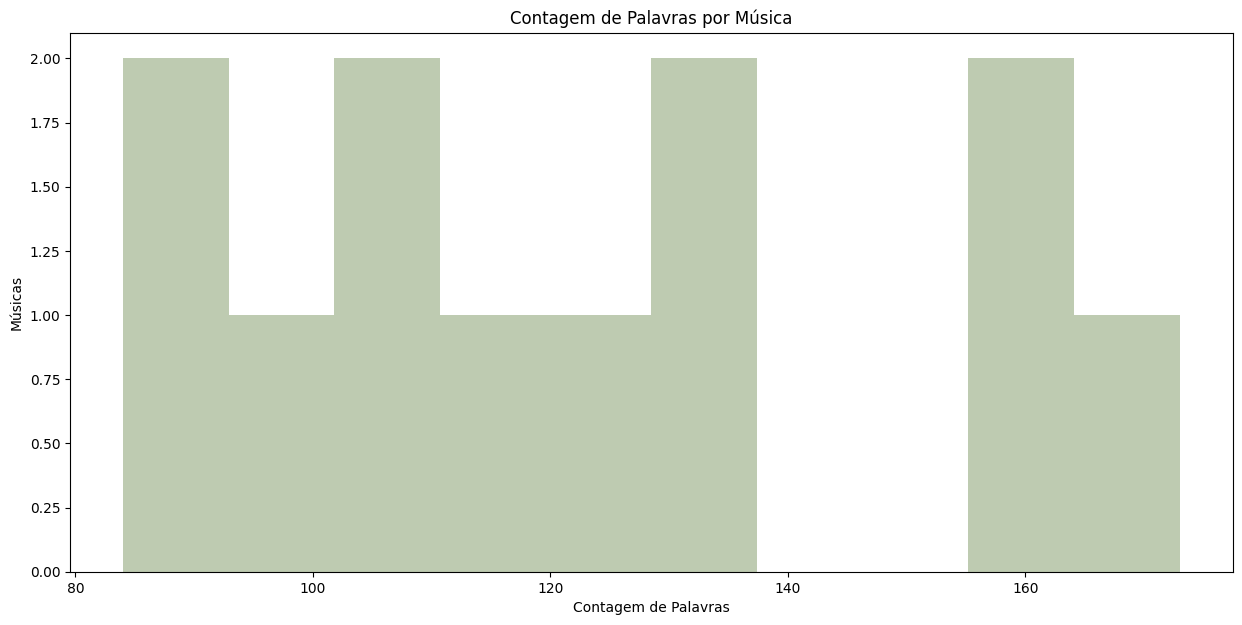

In [97]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_dopamine
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_fl['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

In [98]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_fl['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_fl['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do álbum Fine Line')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    O álbum apresenta apenas 8.3% de polaridade positiva e 16.7% de polaridade positiva, indicando evolução emocional nas composições do artista.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-99-fb892991317a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fl['lyrics'] = df_fl['lyrics'].fillna('')  # Substitui valores nulos por string vazia


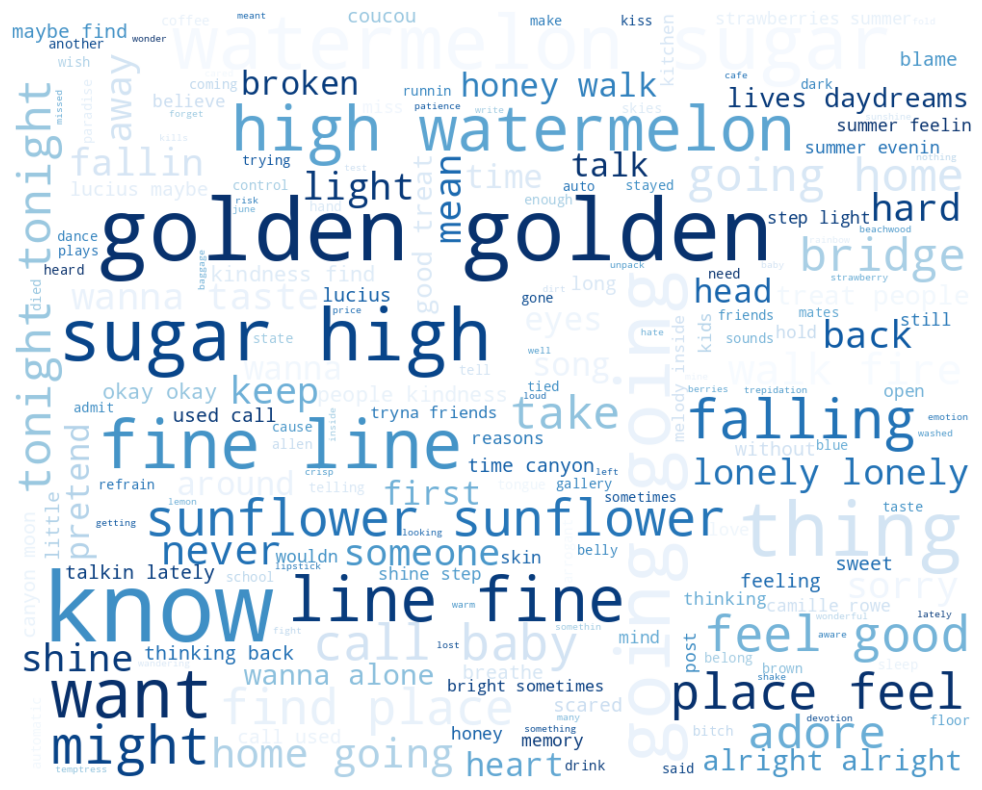

In [99]:
# Exibir os nomes das colunas do DataFrame
print(df_fl.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_fl.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_fl['lyrics'] = df_fl['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_fl['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

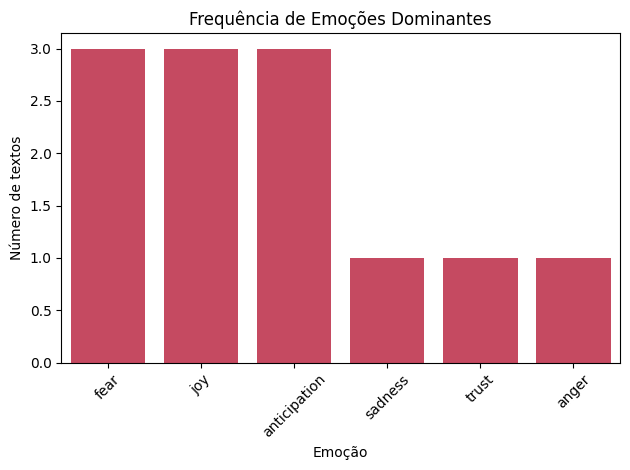

In [100]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_fl,
    order=df_fl['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

#Exibição do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    Dominância de três sentimentos: fear, joy e anticipation.
</div>


In [101]:
# Gerando o Histograma
sns.histplot(df_fl['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

In [102]:
# Gerando o Boxplot
sns.boxplot(x='sentiment', y='score', data=df_fl, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

Nenhuma letra encontrada para a emoção 'surprise'.
Nenhuma letra encontrada para a emoção 'disgust'.


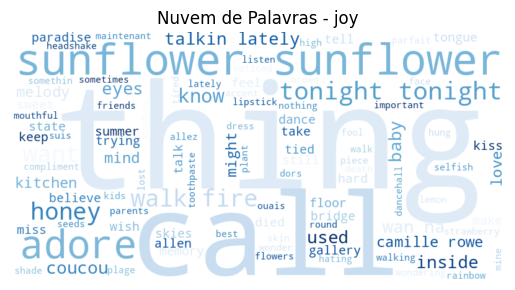

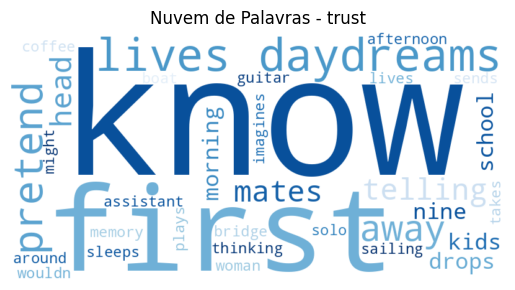

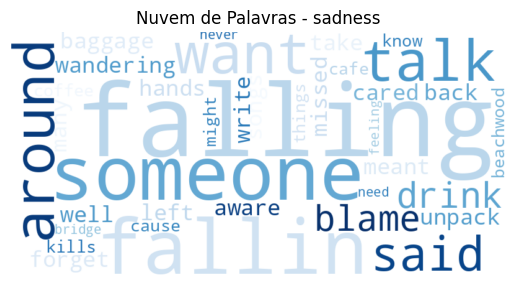

In [103]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_fl[df_fl['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

In [104]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_fl['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

### Análise do álbum Harry's House

Harry's House é o terceiro álbum de estúdio do cantor. O seu lançamento ocorreu em 20 de maio de 2022, através das gravadoras *Columbia Records* e *Erskine Records*. O disco foi desenvolvido e gravado entre 2020 e 2021, sendo produzido por Kid Harpoon, Tyler Johnson e Samuel Witte. Notado como o trabalho mais introspectivo de Styles, o álbum musicalmente incorpora *funk pop*, *pop rock*, *synth-pop* e *R&B*.

*Harry’s House* recebeu análises geralmente positivas de críticos musicais, constando em diversas listas compilatórias dos melhores álbuns de 2022. O álbum foi indicado para o *Mercury Prize* de 2022 e para Álbum do Ano no *Brit Awards* de 2023. No *MTV Video Music Awards* de 2022, o álbum ganhou o prêmio de Álbum do Ano. No *Grammy Awards* de 2023, o álbum ganhou o prêmio de Álbum do Ano e Melhor Álbum Vocal de Pop. Apesar de ter vazado um mês antes de seu lançamento, obteve um desempenho comercial bastante positivo, chegando ao topo das paradas de diversos países, incluindo a Alemanha, Austrália, Bélgica, Canadá, Espanha, França, Irlanda, Itália, Nova Zelândia, Países Baixos, Suécia e Suíça. No Reino Unido, debutou no topo da *UK Albums Chart* com 113 mil unidades vendidas, tornando-se o álbum mais vendido de 2022 no país. Nos EUA, o álbum também debutou no topo da parada *Billboard 200* com 521 mil unidades vendidas.

Três *singles* foram lançados de *Harry's House*. O primeiro *single*, "As It Was", obteve um grande desempenho comercial, chegando ao topo das paradas em 35 países, incluindo no Reino Unido e nos EUA, tornando-se o segundo *single* solo número um de Styles em ambos os países. O segundo, "Late Night Talking", alcançou o top 5 na Austrália, Canadá, EUA, Irlanda, Islândia, Lituânia, Nova Zelândia, Portugal, Reino Unido e Singapura. O terceiro, "Music for a Sushi Restaurant", alcançou o top 10 na Austrália, Canadá, EUA, Irlanda, Nova Zelândia, Portugal e Reino Unido. Para a divulgação do disco, Styles se apresentou em programas televisivos e premiações, e ingressou na turnê *Love On Tour*.

Mais informações em: https://pt.wikipedia.org/wiki/Harry's_House

In [107]:
# Filtrando o DataFrame para excluir álbuns
df_hh = df_original_2[df_original_2['Album'].isin(["Harry’s House"])]

# Exibindo o DataFrame filtrado
df_hh

title  \
1                      As It Was   
6                        Matilda   
15                  Little Freak   
17            Late Night Talking   
18                    Boyfriends   
19                  Keep Driving   
20               Love Of My Life   
21                      Daylight   
23                        Cinema   
24  Music for a Sushi Restaurant   
25                    Grapejuice   
30                     Satellite   
34                   Daydreaming   

                                               lyrics          Album  \
1   come wanna goodnight holdin back gravity holdi...  Harry’s House   
6   riding bike sound deal trying lift ground whee...  Harry’s House   
15  little freak jezebel high atop kitchen counter...  Harry’s House   
17  things quite same there haze horizon babe coup...  Harry’s House   
18  think easy they take granted they know they mi...  Harry’s House   
19  black white film camera yellow sunglasses tray...  Harry’s House   
20  baby love life woah maybe know lost till find ...  Harry’s House   
21  roof airplane seat nose bleedin looking life t...  Harry’s House   
23  gettin darling cool stubborn comes guess time ...  Harry’s House   
24  green eyes fried rice could cook late night ga...  Harry’s House   
25  three yesterday finally came sunny afternoon f...  Harry’s House   
30  life bothering wanna talk share last line then...  Harry’s House   
34  livin daydream said love like paid know gone l...  Harry’s House   

    release_year  Word Count     score     sentiment   filter  
1           2022          97 -0.173554       sadness   neutro  
6           2022         139  0.239669           joy  intenso  
15          2022         111 -0.223140           joy   neutro  
17          2022         128 -0.388430       sadness  intenso  
18          2022          73 -0.289256         anger  intenso  
19          2022         108 -0.206612       sadness   neutro  
20          2022         106 -0.057851           joy  intenso  
21          2022          98 -0.256198       disgust  intenso  
23          2022         120  0.289256           joy  intenso  
24          2022         121  0.074380           joy  intenso  
25          2022          79 -0.041322  anticipation  intenso  
30          2022         119 -0.735537       sadness  intenso  
34          2022         101  0.024793           joy  intenso

In [108]:
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_hh['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 1201 palavras no dataset de letra.
Existem 457 palavras únicas no dataset de letras.


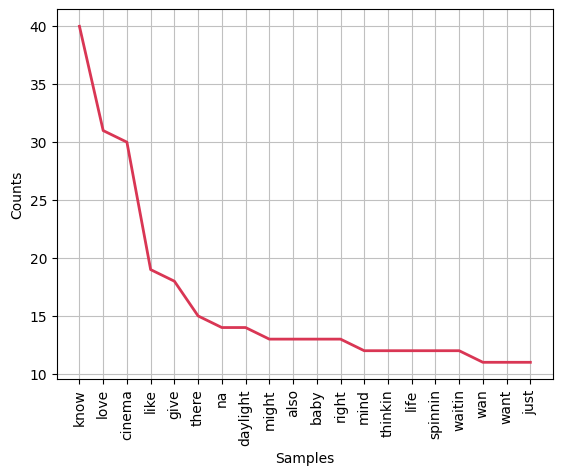

In [109]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

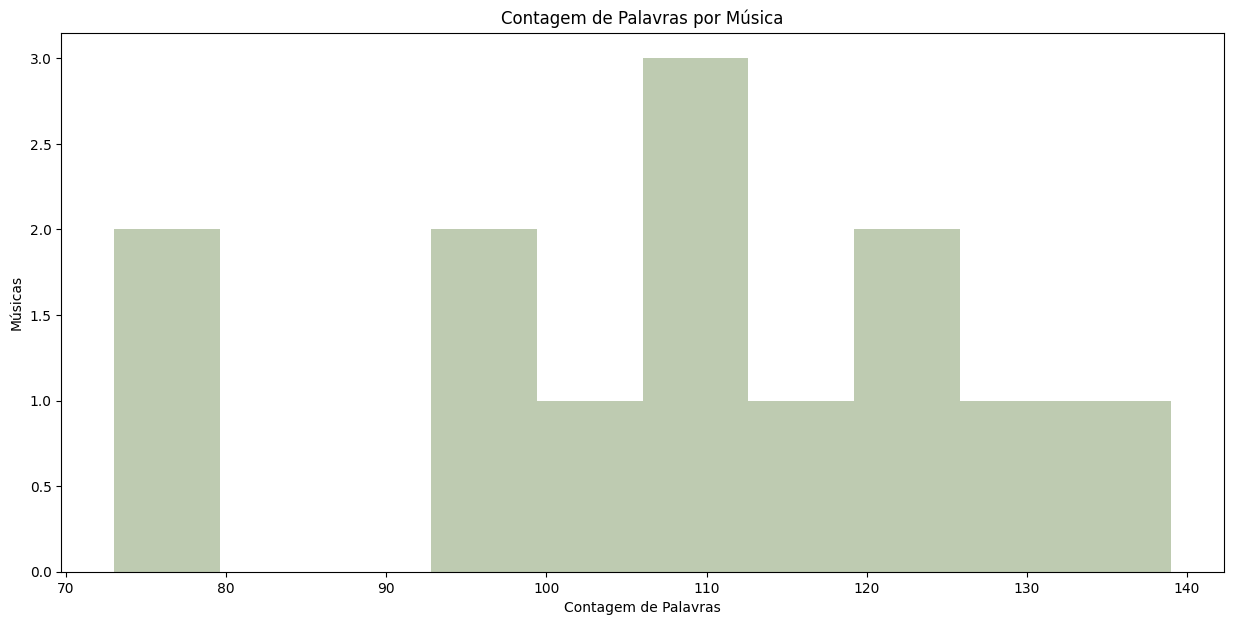

In [110]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_dopamine
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_hh['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

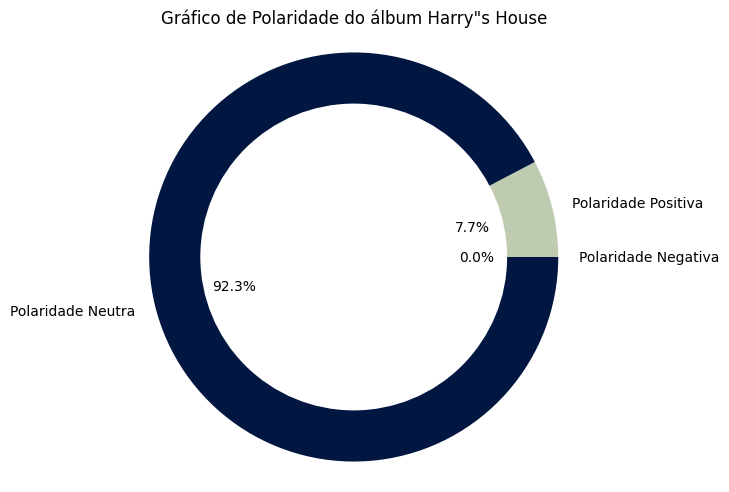

In [112]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_hh['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_hh['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do álbum Harry"s House')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    O álbum não apresenta polaridade negativa.
</div>

In [113]:
# Exibir os nomes das colunas do DataFrame
print(df_hh.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_hh.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_hh['lyrics'] = df_hh['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_hh['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-113-026d721fed33>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hh['lyrics'] = df_hh['lyrics'].fillna('')  # Substitui valores nulos por string vazia


In [114]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_hh,
    order=df_hh['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

#Exibição do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

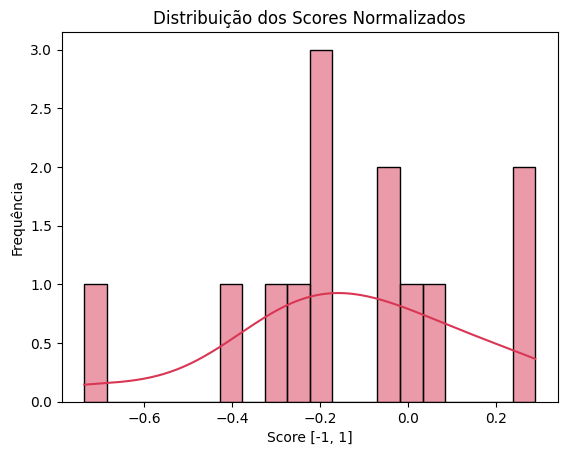

In [115]:
# Gerando o Histograma
sns.histplot(df_hh['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

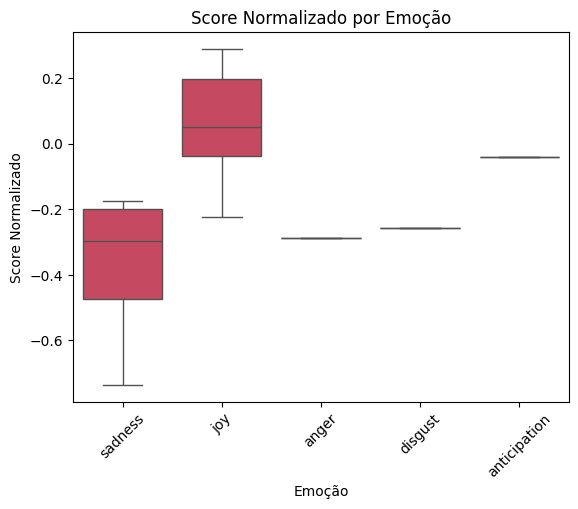

In [116]:
# Gerando o Boxplot
sns.boxplot(x='sentiment', y='score', data=df_hh, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

Nenhuma letra encontrada para a emoção 'fear'.
Nenhuma letra encontrada para a emoção 'surprise'.


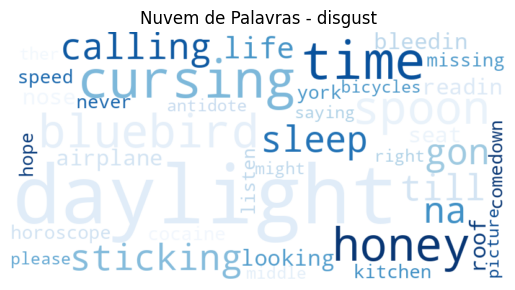

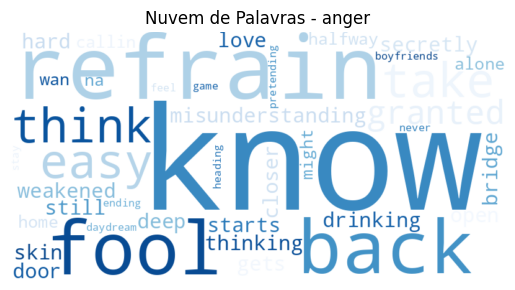

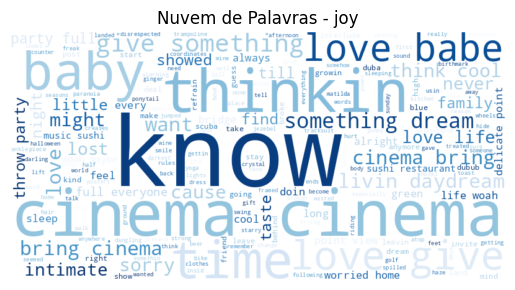

Nenhuma letra encontrada para a emoção 'trust'.


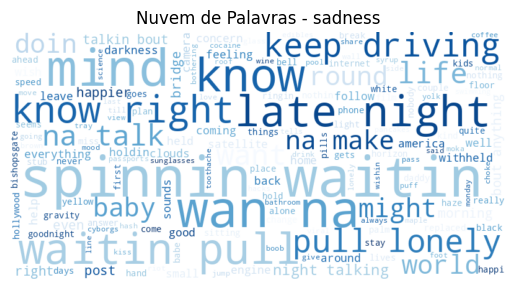

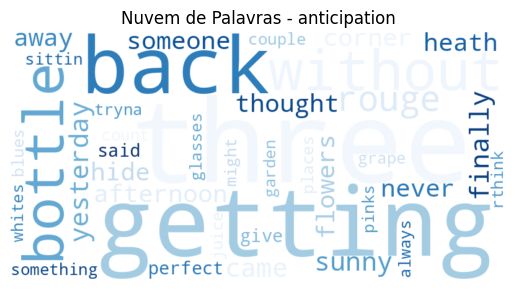

In [117]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_hh[df_hh['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

In [118]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_hh['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()